In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 10

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00446 s
Reach the maximum iteration	 113.32 s
At 100 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.583596837945
Development Accuracy:	 0.452804377565
Evaluation Accuracy:	 0.405940594059


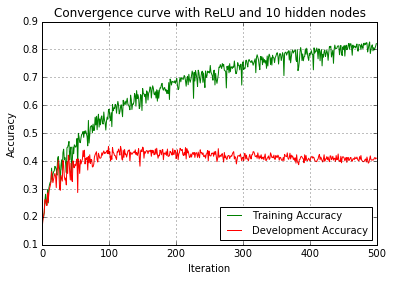

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00178 s
Reach the maximum iteration	 119.56 s
At 268 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.726679841897
Development Accuracy:	 0.463748290014
Evaluation Accuracy:	 0.411441144114


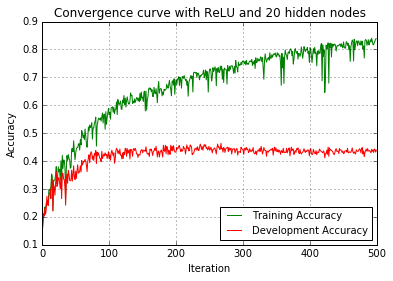

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00086 s
Reach the maximum iteration	 135.87 s
At 205 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.673320158103
Development Accuracy:	 0.443228454172
Evaluation Accuracy:	 0.402640264026


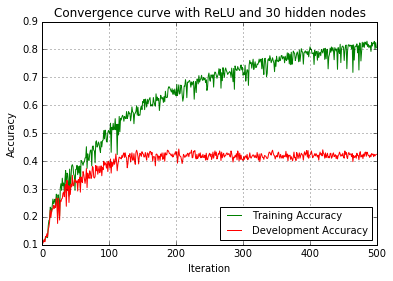

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00101 s
Reach the maximum iteration	 152.42 s
At 164 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.746640316206
Development Accuracy:	 0.488372093023
Evaluation Accuracy:	 0.436743674367


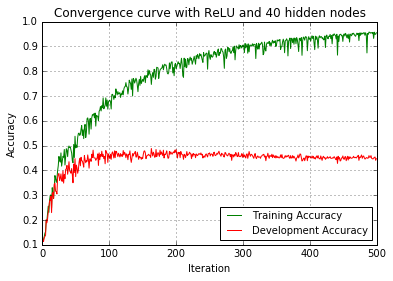

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00097 s
Reach the maximum iteration	 165.84 s
At 123 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.594861660079
Development Accuracy:	 0.444596443228
Evaluation Accuracy:	 0.388338833883


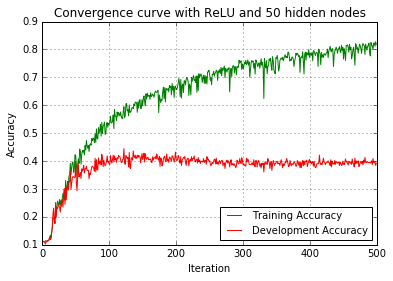

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.05, 0.05, 0.05, 0.05, 0.05]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00159 s
Reach the maximum iteration	 237.12 s
At 189 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.56442687747
Development Accuracy:	 0.455540355677
Evaluation Accuracy:	 0.40704070407


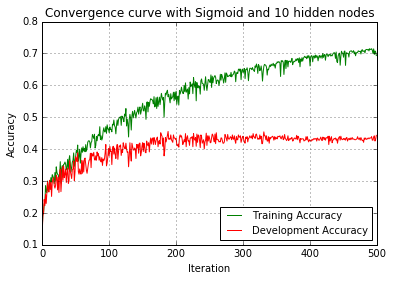

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00132 s
Reach the maximum iteration	 272.21 s
At 420 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.83418972332
Development Accuracy:	 0.508891928865
Evaluation Accuracy:	 0.445544554455


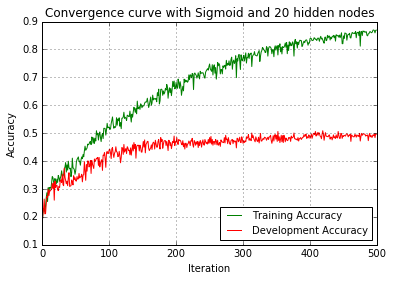

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0012 s
Reach the maximum iteration	 290.8 s
At 219 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.752173913043
Development Accuracy:	 0.514363885089
Evaluation Accuracy:	 0.465346534653


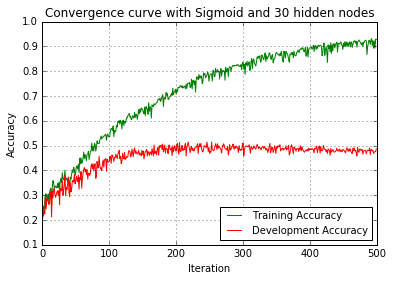

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00131 s
Reach the maximum iteration	 330.2 s
At 248 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.836363636364
Development Accuracy:	 0.518467852257
Evaluation Accuracy:	 0.452145214521


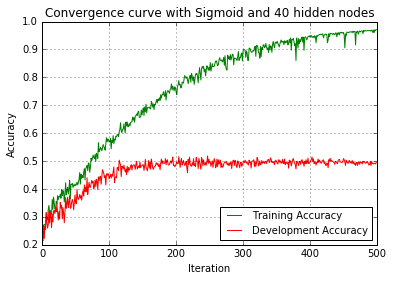

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00143 s
Reach the maximum iteration	 375.91 s
At 258 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.875889328063
Development Accuracy:	 0.499316005472
Evaluation Accuracy:	 0.470847084708


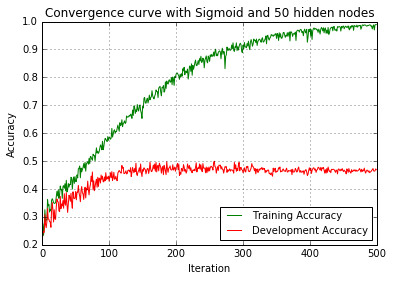

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0018 s
Reach the maximum iteration	 362.26 s
At 236 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.608102766798
Development Accuracy:	 0.444596443228
Evaluation Accuracy:	 0.401540154015


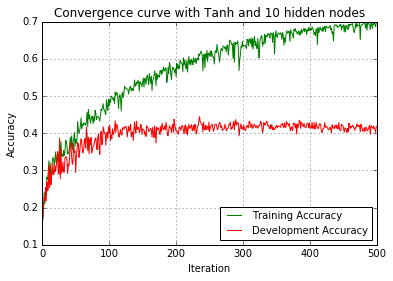

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00154 s
Reach the maximum iteration	 411.19 s
At 185 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.65652173913
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.433443344334


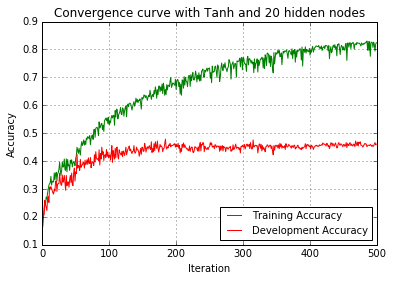

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00163 s
Reach the maximum iteration	 433.18 s
At 136 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.657114624506
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.432343234323


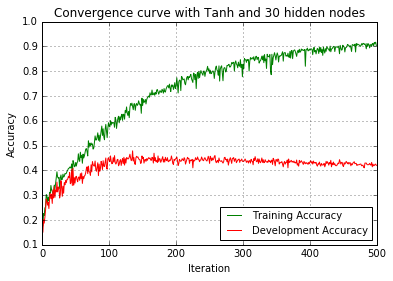

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00319 s
Reach the maximum iteration	 650.3 s
At 114 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.638339920949
Development Accuracy:	 0.489740082079
Evaluation Accuracy:	 0.457645764576


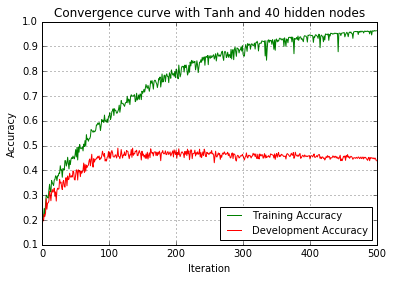

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01246 s
Reach the maximum iteration	 769.26 s
At 138 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.720355731225
Development Accuracy:	 0.511627906977
Evaluation Accuracy:	 0.427942794279


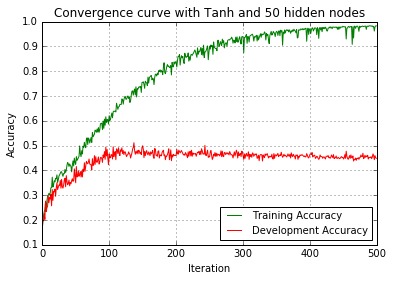

In [8]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.05, 0.05, 0.05, 0.05, 0.05]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()